<a href="https://colab.research.google.com/github/fwx5ax/Final-Project-DS3001/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Project - GSS

1. What is in your data?

Our data is composed of GSS survey data and includes several variables relating to demographic, economic, social, and health-related information of the participants, as well as data on job satisfaction, political views, family dynamics, and more. The data includes both categorical (e.g., marital status, race, political views) and numerical (e.g., income, stress level) variables. For a more specific breakdown of our exact variables, see below:

1. Demographic Variables:
	•	marital: Marital status of the respondent (e.g., married, divorced, never married).
	•	divorce: Whether the respondent has experienced a divorce.
	•	childsinhh: Whether the respondent has children living in the household.
	•	childs: Number of children the respondent has.
	•	hompop_exp: Expected household population.
	•	rspgndr: Respondent’s gender.
	•	educ: Highest level of education attained by the respondent.
	•	degree: Type of degree held (e.g., high school, college).
	•	paeduc: Father's education level.
	•	maeduc: Mother's education level.
	•	wrkstat: Respondent's current work status (e.g., employed, unemployed, retired).
	•	race, raceacs1, raceacs2, raceacs3, raceacs16: Respondent's race or ethnicity and detailed race categories.
	•	sex: Gender of the respondent.
	•	sexornt: Sexual orientation of the respondent.
2. Economic Variables:
	•	sei: Socioeconomic index (measure of occupational status).
	•	realrinc, realinc: Real income or household income adjusted for inflation.
	•	rincome: Any income from occupation?
	•	class: Social class of the respondent.
3. Family and Household:
	•	babies, preteen, teens, adults: Number of individuals in various age groups within the household.
	•	partners: Number of sexual partners the respondent had in the past year.
4. Health-Related Variables:
	•	health: Respondent's self-reported health status.
	•	stress: Level of stress reported by the respondent.
	•	neisafe: Safety perceived in the neighborhood.
	•	physact: Physical activity levels.
	•	smokeday: Whether the respondent smokes daily.
5. Social and Political Views:
	•	polviews: Political views of the respondent (e.g., liberal, conservative).
	•	relig: Religious affiliation.
	•	pray: Frequency of prayer.
	•	attend: Frequency of religious service attendance.
	•	postlife: Beliefs regarding life after death.
	•	fear: Fears related to safety or societal issues.
	•	gunlaw: Opinion on gun laws.
	•	trust: Level of trust in government, people, etc.
6. Job and Work-Related Variables:
	•	joblose: Whether the respondent has lost a job.
	•	jobfind: Whether the respondent found a job after losing one.
	•	spwrksta: Work status of spouse/partner.
	•	cowrksta: Work status of coworkers.
	•	satjob: Job satisfaction (e.g., very satisfied, somewhat satisfied).
7. Well-being and Happiness:
	•	happy: Respondent's overall happiness.
	•	hapmar: Happiness in marriage.
	•	hapcohab: Happiness in cohabitation.
	•	satfin: Satisfaction with financial situation.
8. Safety and Security:
	•	vaxsafe: Perception of vaccine safety.
	•	covid12: Opinion or impact of COVID-19.
	•	evidu: Perception of educational or social issues.
	•	helpful: Perception of helpfulness in society or community.
	•	arrest: Whether the respondent has been arrested.
9. Other Variables:
	•	instype01: Type of health insurance.
	•	condom: Use of contraception, specifically condoms.
	•	jobfind: Whether the respondent was able to find a job after losing one.
10. Subjective Well-Being:
	•	happy: Overall happiness.
	•	hapmar: Happiness in marriage.
	•	hapcohab: Happiness in cohabitation.


2. How will these data be useful for studying the phenomenon you're interested in?

These variables from the GSS data allow our group to understand how social structures, personal well-being, cultural beliefs, and economic conditions interact with one another to shape the state of the world, particularly in the context of current global political and social dynamics, which is the phenomenon we are most interested in. By examining the relationships between various aspects of demographics, economic factors, and emotional well-being, our group is aiming to uncover how societal issues like job insecurity, income inequality, and family life impact overall happiness and stress levels. Furthermore, by examining variables related to political and religious views, our group wants to explore how these factors shape perceptions of trust, safety, and societal issues. We seek to understand how political polarization and the social divisions currently evident in our country may be reflected in this data. Overall, we want to examine the ways in which this data reflects broader social science concerns about inequality, societal well-being, and the evolving nature of family and work life. By analyzing these interactions, we can identify trends that inform better decision-making for policymakers and social scientists, as understanding how different factors influence well-being and societal outcomes allows for more targeted interventions and strategies that can promote a more equitable and less polarized society.

3. What are the challenges you've resolved or expect to face in using them?
Although the dataset appears relatively clean, there is always the issue of data completeness due to some variables being missing, inconsistent, or incomplete. Handling these missing values (NaNs), especially when they are spread across different columns, can require decisions about whether to impute values or just completely drop rows. Data standardization might also be necessary, as variables like political views/religious beliefs/income may be recorded in different formats or categories across time. Another challenge we are expecting to face is multicollinearity, where certain variables may be highly correlated with each other, which could lead to a lot of unnecessary overlap in our analysis and repetition of extracting trends from certain patterns. We could avoid this by dropping particular variables that represent the same thing. The last challenge we expect to face has to do with our interpretation of the interactions between certain variables as some of these relationships might be non-linear and complicated to visually understand what they are saying about the broader picture. As such, we should be very careful in how we read graphs and interpret the trends of the interactions between variables in order to most effectively understand how different factors interact.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
var_list = ['marital', 'divorce', 'childsinhh', 'childs', 'hompop_exp','rspgndr', 'rprnt18',
'educ', 'degree', 'paeduc', 'maeduc', 'wrkstat','hrs1', 'sei', 'realrinc', 'realinc', 'rincome',
'babies','preteen','teens','adults','race', 'raceacs1', 'raceacs2', 'raceacs3',
'raceacs16','racecen1', 'sex', 'sexornt','vaxsafe','covid12','happy','hapmar','hapcohab', 'satfin',
'health', 'stress', 'neisafe','physact', 'instype01', 'partners', 'condom', 'evidu',
 'smokeday', 'arrest', 'trust', 'helpful','joblose', 'jobfind', 'spwrksta', 'cowrksta', 'class',
'polviews', 'relig', 'pray', 'attend', 'postlife', 'fear','gunlaw', 'satjob'] # List of variables you want to save

output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    #print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    #print(df.head()) # Visually inspect the first few rows
    if phase == 0:
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode


In [3]:
gss = pd.read_csv('selected_gss_data.csv')

<ipython-input-3-9e26a9569f66>:1: DtypeWarning: Columns (5,6,22,23,24,25,26,28,29,30,33,36,37,38,39,40,41,42,43,44,50) have mixed types. Specify dtype option on import or set low_memory=False.
  gss = pd.read_csv('selected_gss_data.csv')


In [ ]:
gss.head()

,marital,divorce,children_in_household,number_of_children,gender,educ,degree,father_educ,mother_educ,work_status,...,cohab_work_status,class,polviews,relig,pray,attend,beliefs_afterlife,area_fear,gunlaw,job_satisfaction
0,never married,NaN,NaN,0.0,NaN,16.0,bachelor's,10.0,NaN,working full time,...,NaN,middle class,NaN,jewish,NaN,about once or twice a year,NaN,NaN,favor,a little dissatisfied
1,married,no,NaN,5.0,NaN,10.0,less than high school,8.0,8.0,retired,...,NaN,middle class,NaN,catholic,NaN,every week,NaN,NaN,favor,NaN
2,married,no,NaN,4.0,NaN,12.0,high school,8.0,8.0,working part time,...,NaN,working class,NaN,protestant,NaN,about once a month,NaN,NaN,favor,moderately satisfied
3,married,no,NaN,0.0,NaN,17.0,bachelor's,16.0,12.0,working full time,...,NaN,middle class,NaN,other,NaN,never,NaN,NaN,favor,very satisfied
4,married,no,NaN,2.0,NaN,12.0,high school,8.0,8.0,keeping house,...,NaN,working class,NaN,protestant,NaN,never,NaN,NaN,favor,NaN


In [ ]:
gss['degree'].unique()

array(["bachelor's", 'less than high school', 'high school', 'graduate',
       'associate/junior college', nan], dtype=object)

In [ ]:
gss[['educ','paeduc','maeduc']].describe()

,educ,paeduc,maeduc
count,72127.000000,51529.000000,60605.000000
mean,13.034633,10.905296,11.034024
std,3.182372,4.330440,3.763997
min,0.000000,0.000000,0.000000
25%,12.000000,8.000000,8.000000
50%,12.000000,12.000000,12.000000
75%,16.000000,13.000000,12.000000
max,20.000000,20.000000,20.000000


In [ ]:
gss[['realrinc','realinc','sei']].describe()

,realrinc,realinc,sei
count,42333.000000,64912.000000,31277.000000
mean,23064.143938,32537.399981,48.423570
std,29175.569814,30883.226094,19.183154
min,218.000000,218.000000,17.100000
25%,8308.000000,12080.625000,32.400000
50%,16604.500000,24139.000000,39.000000
75%,28156.500000,40756.500000,63.500000
max,480144.472857,162607.000000,97.200000


In [ ]:
print(gss['rincome'].unique())
print(gss['class'].unique())
gss = gss.drop(columns='rincome')
# we do not need another measure of occupation income - total income will be fine

[nan '$1,000 to $2,999' '$15,000 to $19,999' '$7,000 to $7,999'
 '$8,000 to $9,999' '$20,000 to $24,999' '$4,000 to $4,999'
 '$10,000 to $14,999' '$25,000 or more' '$3,000 to $3,999' 'under $1,000'
 '$5,000 to $5,999' '$6,000 to $6,999']
['middle class' 'working class' 'upper class' 'lower class' nan 'no class']


In [ ]:
gss[['babies','preteen','teens','adults','childs','childsinhh']].describe()

,babies,preteen,teens,adults,childs,childsinhh
count,66210.000000,66181.000000,66269.000000,68289.000000,72129.000000,1768.000000
mean,0.223954,0.275094,0.211698,1.913690,1.916538,0.464932
std,0.564219,0.652489,0.553078,0.812289,1.759511,0.982537
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
75%,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000
max,6.000000,8.000000,8.000000,9.000000,8.000000,8.000000


In [ ]:
print(gss['hompop_exp'].describe())
# total # of people in household
gss = gss.drop(columns='hompop_exp')

print(gss['rspgndr'].unique())
# how the home/childcare labor is divided by gender

print(gss['rprnt18'].unique())
# are u the parent of another child 18 or older in your household?
gss = gss.drop(columns='rprnt18')

count    3538.000000
mean        1.678067
std         1.269275
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: hompop_exp, dtype: float64
[nan 'women and men take equal responsibility'
 'men take much more responsibility'
 'men take somewhat more responsibility'
 'women take somewhat more responsibility'
 'women take much more responsibility']
[nan 'yes' 'no']


In [ ]:
print(gss['racecen1'].unique())
print(gss['race'].unique())

[nan 'white' 'black or african american' 'hispanic' 'other asian' 'samoan'
 'filipino' 'american indian or alaska native' 'other pacific islander'
 'chinese' 'some other race' 'vietnamese' 'asian indian' 'japanese'
 'korean' 'native hawaiian' 'guamanian or chamorro']
['white' 'black' 'other' nan]


In [ ]:
gss = gss.drop(columns=['raceacs1', 'raceacs2', 'raceacs3','raceacs16'])
# these race dummy variables are not needed and can be created by us if we want them

In [ ]:
print(gss['sex'].unique())
print(gss['sexornt'].unique())

['female' 'male' nan]
[nan 'heterosexual or straight' 'gay, lesbian, or homosexual' 'bisexual']


In [ ]:
print(gss['divorce'].unique())
print(gss['marital'].unique())
print(gss['hapmar'].unique())
print(gss['hapcohab'].unique())
print(gss['partners'].describe())

[nan 'no' 'yes']
['never married' 'married' 'divorced' 'widowed' 'separated' nan]
[nan 'very happy' 'pretty happy' 'not too happy']
[nan 'very happy' 'pretty happy' 'not too happy']
count         37672
unique           10
top       1 partner
freq          24059
Name: partners, dtype: object


In [ ]:
print(gss['happy'].unique())
print(gss['satfin'].unique())
print(gss['health'].unique())
print(gss['stress'].unique())
print(gss['physact'].unique())

['not too happy' 'pretty happy' 'very happy' nan]
['not satisfied at all' 'more or less satisfied' 'pretty well satisfied'
 nan]
['good' 'fair' 'excellent' 'poor' nan]
[nan 'sometimes' 'often' 'hardly ever' 'never' 'always']
[nan 'once a month or less often' 'several times a month'
 'several times a week' 'daily' 'never']


In [ ]:
print(gss['wrkstat'].unique())
print(gss['joblose'].unique())
print(gss['jobfind'].unique())
print(gss['spwrksta'].unique())
print(gss['cowrksta'].unique())
print(gss['satjob'].unique())
print(gss['hrs1'].describe())

['working full time' 'retired' 'working part time' 'keeping house'
 'in school' 'unemployed, laid off, looking for work'
 'with a job, but not at work because of temporary illness, vacation, strike'
 'other' nan]
[nan 'not likely' 'not too likely' 'very likely' 'fairly likely'
 'leaving labor force']
[nan 'not easy' 'very easy' 'somewhat easy']
[nan 'keeping house' 'working full time'
 'with a job, but not at work because of temporary illness, vacation, strike'
 'working part time' 'retired' 'unemployed, laid off, looking for work'
 'in school' 'other']
[nan 'working full time' 'keeping house' 'retired'
 'unemployed, laid off, looking for work' 'in school' 'working part time'
 'other'
 'with a job, but not at work because of temporary illness, vacation, strike']
['a little dissatisfied' nan 'moderately satisfied' 'very satisfied'
 'very dissatisfied']
count    41560.000000
mean        41.183951
std         14.125299
min          0.000000
25%         37.000000
50%         40.000000
75% 

In [ ]:
print(gss['evidu'].describe())
print(gss['smokeday'].describe())
print(gss['arrest'].describe())

count     23790
unique        2
top          no
freq      23077
Name: evidu, dtype: object
count                           1128
unique                             7
top       do not smoke and never did
freq                             665
Name: smokeday, dtype: object
count     12342
unique        3
top          no
freq      10781
Name: arrest, dtype: object


In [ ]:
print(gss['vaxsafe'].describe())
print(gss['covid12'].describe())
print(gss['instype01'].describe())
print(gss['condom'].describe())

count      1232
unique        5
top       agree
freq        430
Name: vaxsafe, dtype: object
count     1226
unique       2
top        yes
freq       999
Name: covid12, dtype: object
count                         981
unique                          5
top       public health insurance
freq                          363
Name: instype01, dtype: object
count        27537
unique           2
top       not used
freq         21606
Name: condom, dtype: object


In [ ]:
gss = gss.drop(columns=['helpful','trust'])
# not necessarily interesting

In [ ]:
print(gss['pray'].describe())
print(gss['attend'].describe())
print(gss['relig'].describe())
print(gss['postlife'].describe())

count          43269
unique             6
top       once a day
freq           12083
Name: pray, dtype: object
count     71690
unique        9
top       never
freq      13855
Name: attend, dtype: object
count          71953
unique            13
top       protestant
freq           40125
Name: relig, dtype: object
count     44148
unique        2
top         yes
freq      35337
Name: postlife, dtype: object


In [ ]:
print(gss['neisafe'].describe())
print(gss['fear'].describe())
print(gss['gunlaw'].describe())
print(gss['polviews'].describe())

count          6646
unique            4
top       very safe
freq           3464
Name: neisafe, dtype: object
count     45781
unique        2
top          no
freq      27793
Name: fear, dtype: object
count     48307
unique        2
top       favor
freq      36367
Name: gunlaw, dtype: object
count                            62718
unique                               7
top       moderate, middle of the road
freq                             23992
Name: polviews, dtype: object


In [ ]:
# Rename columns in the GSS for clarity
gss = gss.rename(columns={
    'childsinhh': 'children_in_household',
    'childs': 'number_of_children',
    'rspgndr': 'gender',
    'paeduc': 'father_educ',
    'maeduc': 'mother_educ',
    'wrkstat': 'work_status',
    'hrs1': 'hours_worked',
    'realrinc': 'real_income',
    'realinc': 'household_income',
    'race': 'race_ethnicity',
    'racecen1': 'race_detailed',
    'vaxsafe': 'vaccine_safety',
    'covid12': 'covid19_impact',
    'hapmar': 'marriage_happiness',
    'hapcohab': 'cohab_happiness',
    'satfin': 'financial_satis',
    'neisafe': 'neighborhood_safety',
    'instype01': 'health_insurance',
    'partners': 'number_partners',
    'evidu': 'inj_drugs',
    'spwrksta': 'spouse_work_status',
    'cowrksta': 'cohab_work_status',
    'postlife': 'beliefs_afterlife',
    'fear': 'area_fear',
    'satjob': 'job_satisfaction'
})


In [ ]:
gss.head()

,marital,divorce,children_in_household,number_of_children,gender,educ,degree,father_educ,mother_educ,work_status,...,cohab_work_status,class,polviews,relig,pray,attend,beliefs_afterlife,area_fear,gunlaw,job_satisfaction
0,never married,NaN,NaN,0.0,NaN,16.0,bachelor's,10.0,NaN,working full time,...,NaN,middle class,NaN,jewish,NaN,about once or twice a year,NaN,NaN,favor,a little dissatisfied
1,married,no,NaN,5.0,NaN,10.0,less than high school,8.0,8.0,retired,...,NaN,middle class,NaN,catholic,NaN,every week,NaN,NaN,favor,NaN
2,married,no,NaN,4.0,NaN,12.0,high school,8.0,8.0,working part time,...,NaN,working class,NaN,protestant,NaN,about once a month,NaN,NaN,favor,moderately satisfied
3,married,no,NaN,0.0,NaN,17.0,bachelor's,16.0,12.0,working full time,...,NaN,middle class,NaN,other,NaN,never,NaN,NaN,favor,very satisfied
4,married,no,NaN,2.0,NaN,12.0,high school,8.0,8.0,keeping house,...,NaN,working class,NaN,protestant,NaN,never,NaN,NaN,favor,NaN


In [ ]:
numeric_columns = gss.select_dtypes(include=['number']).columns
print("Numeric columns:", numeric_columns)

Numeric columns: Index(['children_in_household', 'number_of_children', 'educ', 'father_educ',
       'mother_educ', 'hours_worked', 'sei', 'real_income', 'household_income',
       'babies', 'preteen', 'teens', 'adults'],
      dtype='object')


In [ ]:
categorical_columns = gss.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['marital', 'divorce', 'gender', 'degree', 'work_status',
       'race_ethnicity', 'race_detailed', 'sex', 'sexornt', 'vaccine_safety',
       'covid19_impact', 'happy', 'marriage_happiness', 'cohab_happiness',
       'financial_satis', 'health', 'stress', 'neighborhood_safety', 'physact',
       'health_insurance', 'number_partners', 'condom', 'inj_drugs',
       'smokeday', 'arrest', 'joblose', 'jobfind', 'spouse_work_status',
       'cohab_work_status', 'class', 'polviews', 'relig', 'pray', 'attend',
       'beliefs_afterlife', 'area_fear', 'gunlaw', 'job_satisfaction'],
      dtype='object')


After exploring the variables, here is a final list of the variables in the dataset. We dropped some variables and renamed many for clarity.

'marital', 'divorce', 'children_in_household', 'number_of_children', 'gender', 'educ',
 'degree', 'father_educ', 'mother_educ', 'work_status', 'hours_worked', 'sei', 'real_income',
 'household_income', 'babies', 'preteen', 'teens', 'adults', 'race_ethnicity', 'race_detailed',
 'sex', 'sexornt', 'vaccine_safety', 'covid19_impact', 'happy', 'marriage_happiness',
 'cohab_happiness', 'financial_satis', 'health', 'stress', 'neighborhood_safety', 'physact',
 'health_insurance', 'number_partners', 'condom', 'inj_drugs', 'smokeday', 'arrest', 'joblose',
 'jobfind', 'spouse_work_status', 'cohab_work_status', 'class', 'polviews', 'relig', 'pray', 'attend',
 'beliefs_afterlife', 'area_fear', 'gunlaw', 'job_satisfaction'

# Visualizations

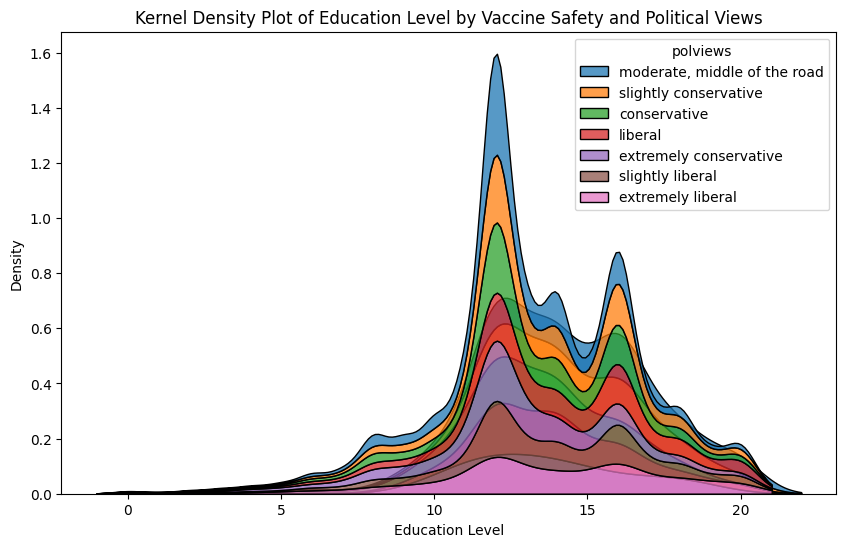

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by 'vaccine_safety' and 'beliefs_afterlife' and plotting the kernel density
plt.figure(figsize=(10, 6))
sns.kdeplot(data=gss, x="educ", hue="vaccine_safety", multiple="stack", common_norm=False)
sns.kdeplot(data=gss, x="educ", hue="polviews", multiple="stack", common_norm=False)

plt.title('Kernel Density Plot of Education Level by Vaccine Safety and Political Views')
plt.xlabel('Education Level')
plt.ylabel('Density')
plt.show()

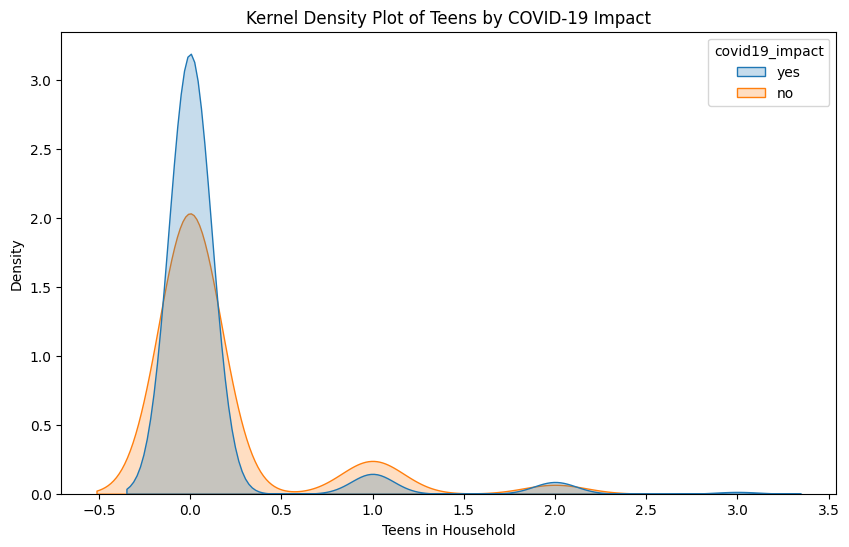

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=gss, x='teens', hue='covid19_impact', common_norm=False, fill=True)
plt.title('Kernel Density Plot of Teens by COVID-19 Impact')
plt.xlabel('Teens in Household')
plt.ylabel('Density')
plt.show()

<ipython-input-50-88aae307d70b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_filtered['log_real_income'] = np.log1p(gss_filtered['real_income'])  # Log-transform real income


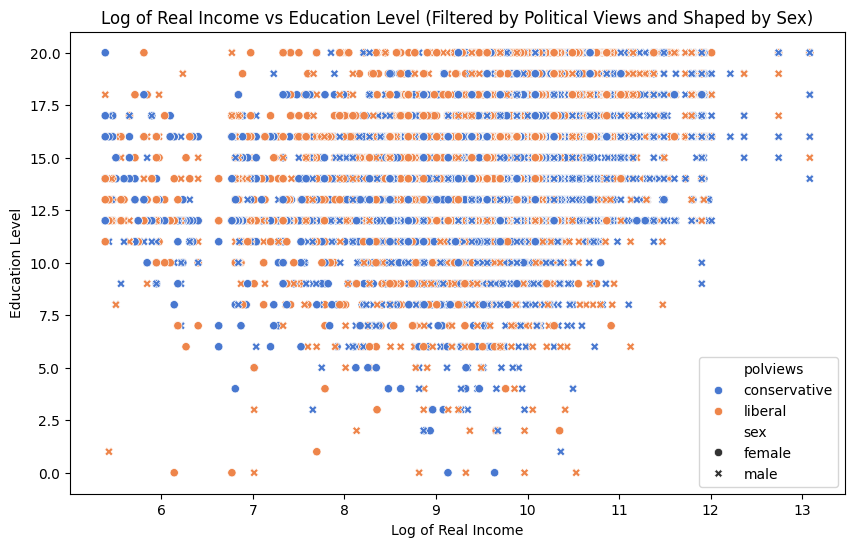

In [ ]:
# Filter the dataset to include only the specified political views
gss_filtered = gss[gss['polviews'].isin(['liberal', 'conservative'])]

# Apply log transformation to 'real_income'
gss_filtered['log_real_income'] = np.log1p(gss_filtered['real_income'])  # Log-transform real income

# Create the scatter plot with the transformed variable
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gss_filtered, x='log_real_income', y='educ', hue='polviews', style='sex', palette='muted')
plt.title('Log of Real Income vs Education Level (Filtered by Political Views and Shaped by Sex)')
plt.xlabel('Log of Real Income')
plt.ylabel('Education Level')
plt.show()

<ipython-input-51-110240d5a3b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gss, x='health', y='stress', palette='pastel')


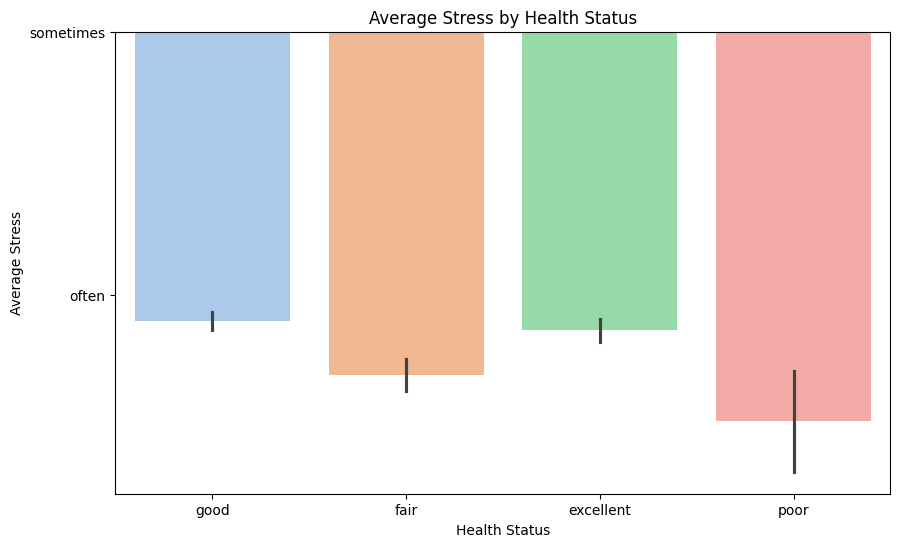

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gss, x='health', y='stress', palette='pastel')
plt.title('Average Stress by Health Status')
plt.xlabel('Health Status')
plt.ylabel('Average Stress')
plt.show()

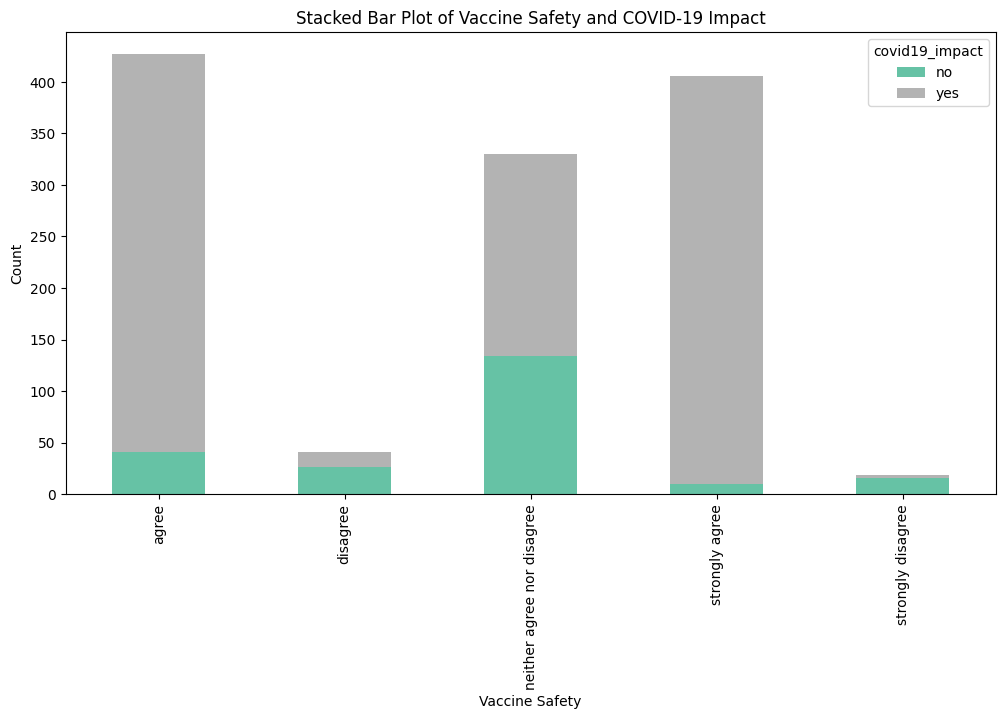

In [ ]:
vaccine_impact = gss.groupby(['vaccine_safety', 'covid19_impact']).size().unstack().fillna(0)
vaccine_impact.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Stacked Bar Plot of Vaccine Safety and COVID-19 Impact')
plt.xlabel('Vaccine Safety')
plt.ylabel('Count')
plt.show()

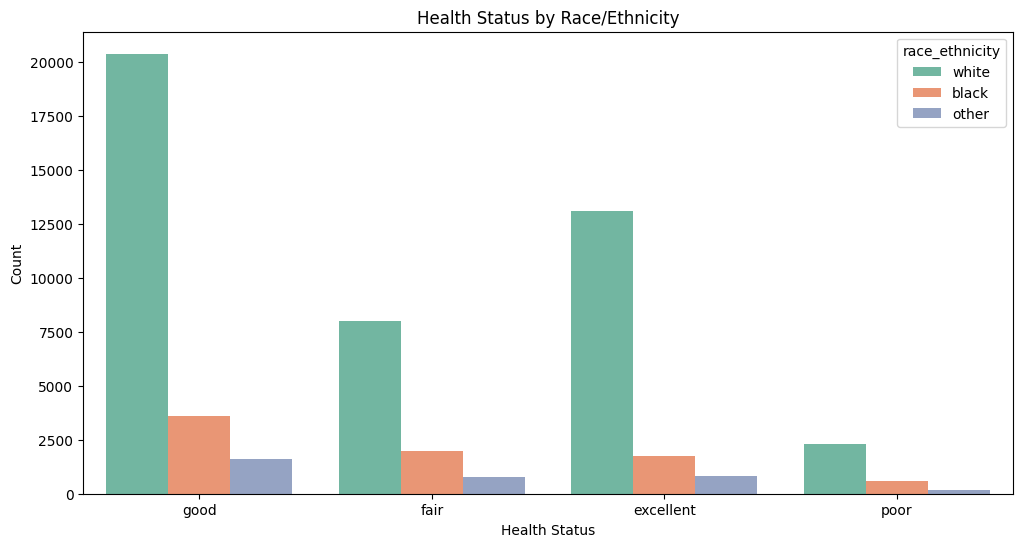

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=gss, x='health', hue='race_ethnicity', palette='Set2')
plt.title('Health Status by Race/Ethnicity')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.show()


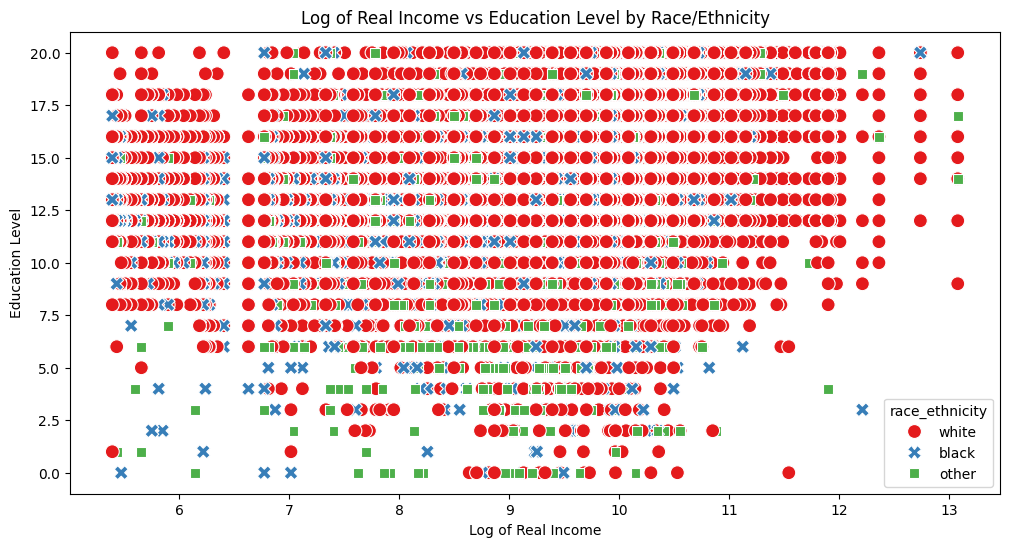

In [ ]:
# Apply log transformation to 'real_income'
gss['log_real_income'] = np.log1p(gss['real_income'])  # Log-transform real income

# Create the scatter plot with the transformed variable and increased dot size
plt.figure(figsize=(12, 6))
sns.scatterplot(data=gss, x='log_real_income', y='educ', hue='race_ethnicity', style='race_ethnicity',
                palette='Set1', s=100)  # 's' controls the size of the dots (default is 40)

plt.title('Log of Real Income vs Education Level by Race/Ethnicity')
plt.xlabel('Log of Real Income')
plt.ylabel('Education Level')
plt.show()

In [10]:


import pandas as pd

# Load the data
file_path = '/content/selected_gss_data.csv'
gss = pd.read_csv(file_path)

# Preview to confirm the data
print(gss.head())
print(gss.columns)

# Descriptive Statistics
desc_stats = gss[['educ', 'realrinc', 'realinc', 'polviews', 'happy', 'sex']].describe(include='all').transpose()
print("\nDescriptive Statistics Table:")
print(desc_stats)


<ipython-input-10-e6fa18fc66c6>:5: DtypeWarning: Columns (5,6,22,23,24,25,26,28,29,30,33,36,37,38,39,40,41,42,43,44,50) have mixed types. Specify dtype option on import or set low_memory=False.
  gss = pd.read_csv(file_path)


         marital divorce  childsinhh  childs  hompop_exp rspgndr rprnt18  \
0  never married     NaN         NaN     0.0         NaN     NaN     NaN   
1        married      no         NaN     5.0         NaN     NaN     NaN   
2        married      no         NaN     4.0         NaN     NaN     NaN   
3        married      no         NaN     0.0         NaN     NaN     NaN   
4        married      no         NaN     2.0         NaN     NaN     NaN   

   educ                 degree  paeduc  ...  cowrksta          class  \
0  16.0             bachelor's    10.0  ...       NaN   middle class   
1  10.0  less than high school     8.0  ...       NaN   middle class   
2  12.0            high school     8.0  ...       NaN  working class   
3  17.0             bachelor's    16.0  ...       NaN   middle class   
4  12.0            high school     8.0  ...       NaN  working class   

   polviews       relig  pray                      attend postlife  fear  \
0       NaN      jewish   NaN  abo

In [9]:
# 1. Income by Degree
income_by_degree = gss.groupby('degree')['realrinc'].describe()
print("\nIncome by Degree:")
print(income_by_degree)


Income by Degree:
                            count          mean           std    min  \
degree                                                                 
associate/junior college   3072.0  21749.289280  23692.307400  218.0   
bachelor's                 7848.0  31882.240770  36119.850097  218.0   
graduate                   4287.0  45426.651691  49353.815921  218.0   
high school               21848.0  18036.863193  19667.431228  218.0   
less than high school      5234.0  13341.641813  16120.659521  218.0   

                                25%      50%         75%            max  
degree                                                                   
associate/junior college  10355.000  17954.0  27171.0000  480144.472857  
bachelor's                14170.000  23980.0  36151.4375  480144.472857  
graduate                  21060.000  32500.0  49813.5000  480144.472857  
high school                7363.125  14245.0  23563.0000  480144.472857  
less than high school      4447.

In [11]:
# 2. Happiness by Political Views (cross tab)
happiness_by_polviews = pd.crosstab(gss['polviews'], gss['happy'], normalize='index') * 100
print("\nHappiness by Political Views (percentages):")
print(happiness_by_polviews)


Happiness by Political Views (percentages):
happy                         not too happy  pretty happy  very happy
polviews                                                             
conservative                      12.124876     51.896230   35.978894
extremely conservative            17.565632     42.291169   40.143198
extremely liberal                 20.236920     51.628825   28.134255
liberal                           14.623278     58.344585   27.032136
moderate, middle of the road      13.722039     57.713280   28.564682
slightly conservative             11.557789     56.880145   31.562066
slightly liberal                  13.428757     59.635654   26.935589


In [15]:
# 3. Political Views by Gender (cross tab)
polviews_by_gender = pd.crosstab(gss['sex'], gss['polviews'], normalize='index') * 100
print("\nPolitical Views by Gender (percentages):")
print(polviews_by_gender)


Political Views by Gender (percentages):
polviews  conservative  extremely conservative  extremely liberal    liberal  \
sex                                                                            
female       13.952480                3.188230           3.240259  12.466759   
male         16.115452                3.763959           3.407185  11.780656   

polviews  moderate, middle of the road  slightly conservative  \
sex                                                             
female                       40.409296              14.091224   
male                         35.584573              16.814728   

polviews  slightly liberal  
sex                         
female           12.651752  
male             12.533448  


In [13]:
# 4. Political Views by Age Group
gss['educ_group'] = pd.cut(gss['educ'], bins=[0, 11, 15, 20], labels=['High School or Less', 'Some College', 'Bachelor+'])
polviews_by_educ = pd.crosstab(gss['educ_group'], gss['polviews'], normalize='index') * 100
print("\nPolitical Views by Education Level (percentages):")
print(polviews_by_educ)


Political Views by Education Level (percentages):
polviews             conservative  extremely conservative  extremely liberal  \
educ_group                                                                     
High School or Less     13.973725                4.555537           3.514759   
Some College            14.903366                3.489397           2.599424   
Bachelor+               15.676874                2.552885           4.632349   

polviews               liberal  moderate, middle of the road  \
educ_group                                                     
High School or Less  10.467497                     42.654837   
Some College         10.271398                     41.996123   
Bachelor+            17.211003                     27.476479   

polviews             slightly conservative  slightly liberal  
educ_group                                                    
High School or Less              13.171814         11.661832  
Some College                     15.19

In [14]:
# 5. Happiness by Income Quartile
gss['income_group'] = pd.qcut(gss['realrinc'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
happiness_by_income = pd.crosstab(gss['income_group'], gss['happy'], normalize='index') * 100
print("\nHappiness by Income Level (percentages):")
print(happiness_by_income)



Happiness by Income Level (percentages):
happy         not too happy  pretty happy  very happy
income_group                                         
Low               16.052235     57.317931   26.629834
Medium            13.912689     58.822929   27.264382
High              10.290237     59.671200   30.038563
Very High          8.170334     56.876528   34.953138
